In [4]:
import pymc as pm

lambda_ = pm.Exponential("poisson_param", 1)

data_generator = pm.Poisson("data_generator", lambda_)
data_plus_one = data_generator + 1


In [5]:
print("lambda_ の　子 は？")
print(lambda_.children)

print("data_generator の　親は？")
print(data_generator.parents)

print("data_generator の 子は？")
print(data_generator.children)

lambda_ の　子 は？
{<pymc.distributions.new_dist_class.<locals>.new_class 'data_generator' at 0x1a160c1a20>}
data_generator の　親は？
{'mu': <pymc.distributions.new_dist_class.<locals>.new_class 'poisson_param' at 0x1a160c19b0>}
data_generator の 子は？
{<pymc.PyMCObjects.Deterministic '(data_generator_add_1)' at 0x1a160c1b00>}


In [6]:
print("lambda_.value = ", lambda_.value) # λ=1の指数分布がその確率にもとづいて確率変数が出力される
print("data_generator.value = ", data_generator.value)
print("data_plus_one = ", data_plus_one.value)

lambda_.value =  0.46210480067845916
data_generator.value =  0
data_plus_one =  1


In [7]:
discrete_uni_var = pm.DiscreteUniform("discrete_uni_var", 0, 4)
discrete_uni_var??

In [8]:
# よくない
beta_1 = pm.Uniform("beta_1",0,1)
beta_2 = pm.Uniform("beta_2",0,1)

#こっちのほうが良い
N=10
betas = pm.Uniform("betas", 0, 1, size=N)


In [9]:
# stochastic 変数のrandom()によって親変数の変更に依存した新しいランダムな値が返される

lambda_1=pm.Exponential("lambda_1", 1) #  後半の事前分布
lambda_2=pm.Exponential("lambda_2", 1) #  後半の事前分布
tau = pm.DiscreteUniform("tau", lower=0, upper=10) # 変化点の事前分布

print("Initialized values... ")
print("lambda_1.value = ", lambda_1.value)
print("lambda_2.value = ", lambda_2.value)
print('tau.value = ', tau.value)

lambda_1.random()
lambda_2.random()
tau.random()

print()
print("After calling random() on the variables ... ")
print("lambda_1.value = ", lambda_1.value)
print("lambda_2.value = ", lambda_2.value)
print('tau.value = ', tau.value)

Initialized values... 
lambda_1.value =  1.2448390442172663
lambda_2.value =  0.9808892716246194
tau.value =  9

After calling random() on the variables ... 
lambda_1.value =  1.391181633896185
lambda_2.value =  0.0815455505851446
tau.value =  3


In [10]:
@pm.deterministic
def some_deterministic(stoch=discrete_uni_var):
    #return stoch.value**2 は 間違い
    return stoch**2

(0, 8)

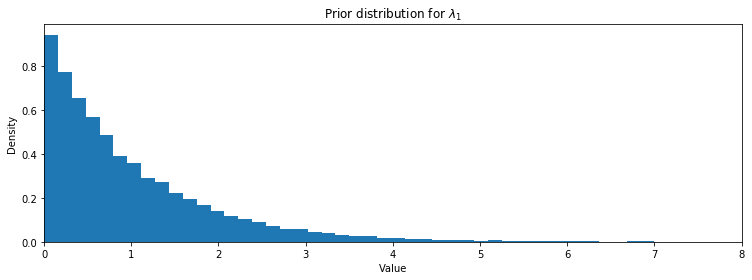

In [11]:
from IPython.core.pylabtools import figsize
from matplotlib import pyplot as plt
%matplotlib inline 
import numpy as np
figsize(12.5 ,4 )
samples=[lambda_1.random() for i in range(20000)]
plt.hist(samples, bins=70, normed=True, histtype="stepfilled")

plt.title("Prior distribution for $\lambda_1$")
plt.xlabel("Value")
plt.ylabel("Density")
plt.xlim(0 ,8)

In [11]:
data = np.array([10,5])
fixed_variable = pm.Poisson("fvd", value=data, observed=True)
print("value: ", fixed_variable.value)
print("calling .random()")

fixed_variable.random()
print("value: ", fixed_variable.value)

value:  [10  5]
calling .random()
value:  [10  5]


In [12]:
tau = pm.rdiscrete_uniform(0, 80)
print(tau)

50


In [13]:
alpha=1. /20.
lambda_1, lambda_2 =pm.rexponential(alpha, 2)
print(lambda_1, lambda_2)


25.0358108255 6.59280176682


In [14]:
lambda_ = np.r_[lambda_1 * np.ones(tau) , lambda_2 * np.ones(80-tau)]
print(lambda_)

[ 25.03581083  25.03581083  25.03581083  25.03581083  25.03581083
  25.03581083  25.03581083  25.03581083  25.03581083  25.03581083
  25.03581083  25.03581083  25.03581083  25.03581083  25.03581083
  25.03581083  25.03581083  25.03581083  25.03581083  25.03581083
  25.03581083  25.03581083  25.03581083  25.03581083  25.03581083
  25.03581083  25.03581083  25.03581083  25.03581083  25.03581083
  25.03581083  25.03581083  25.03581083  25.03581083  25.03581083
  25.03581083  25.03581083  25.03581083  25.03581083  25.03581083
  25.03581083  25.03581083  25.03581083  25.03581083  25.03581083
  25.03581083  25.03581083  25.03581083  25.03581083  25.03581083
   6.59280177   6.59280177   6.59280177   6.59280177   6.59280177
   6.59280177   6.59280177   6.59280177   6.59280177   6.59280177
   6.59280177   6.59280177   6.59280177   6.59280177   6.59280177
   6.59280177   6.59280177   6.59280177   6.59280177   6.59280177
   6.59280177   6.59280177   6.59280177   6.59280177   6.59280177
   6.59280

In [15]:
data = pm.rpoisson(lambda_ )
print(data)

[34 33 28 25 18 23 32 26 23 20 28 22 24 25 26 17 21 29 23 19 30 25 17 25 30
 19 27 26 30 33 23 26 25 28 28 28 21 36 31 30 36 25 17 15 27 25 34 32 23 19
  5  6  5  6  3  5  5  9  9 10 10  8  8  6  8 10  4 10  9  6  8  7  9  4  4
  5  4  6  3 12]


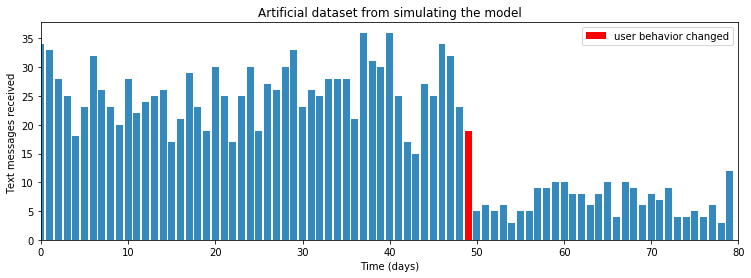

In [16]:
plt.bar(np.arange(80), data, color="#348ABD")
plt.bar(tau-1, data[tau-1], color="r", label="user behavior changed")

plt.xlabel("Time (days)")
plt.ylabel("Text messages received ")
plt.title("Artificial dataset from simulating the model")
plt.xlim(0, 80)
plt.legend()

In [17]:
def plot_artificial_sms_dataset():
    tau = pm.rdiscrete_uniform(0, 80)
    alpha = 1. / 20.
    lambda_1, lambda_2 = pm.rexponential(alpha, 2)
    data = np.r_[pm.rpoisson(lambda_1, tau), pm.rpoisson(lambda_2, 80-tau)]
    plt.bar(np.arange(80), data, color="#348ABD")
    plt.bar(tau-1, data[tau-1], color="r", label="user behavior changed")
    plt.xlim(0, 80)
    plt.legend()

figsize(12.5, 20)
plt.suptitle("More examples of a d ")

Text(0.5,0.98,'More examples of a d ')

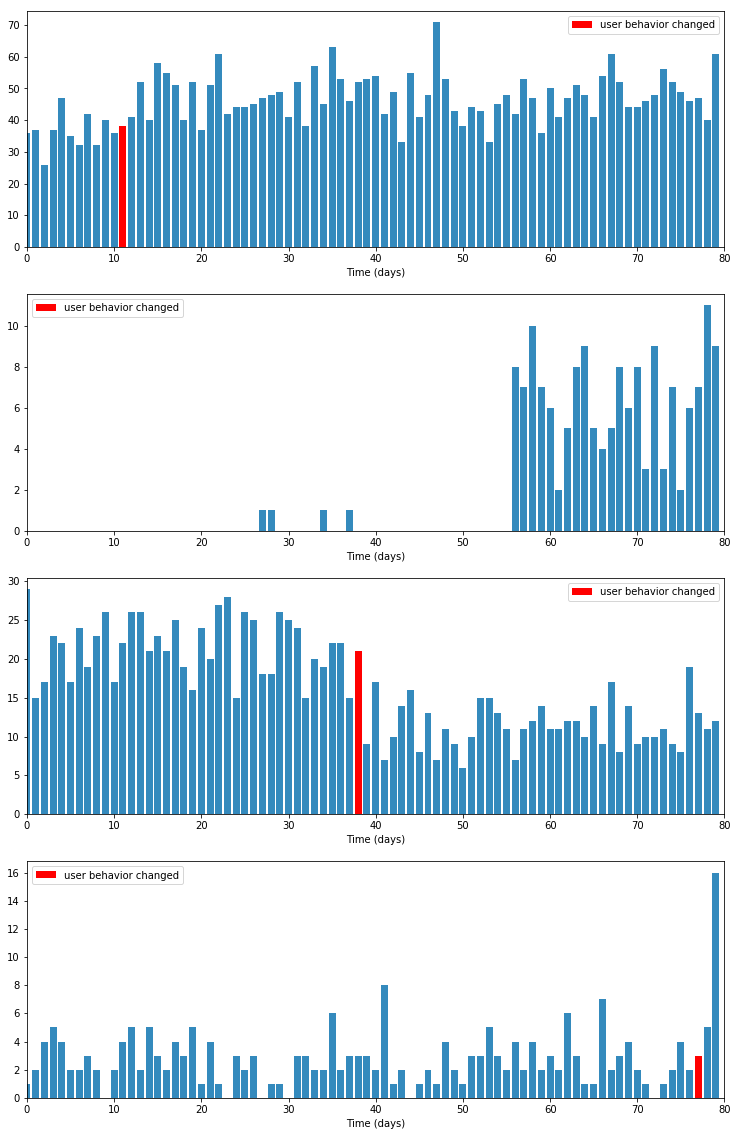

In [18]:
for i in range(4):
    plt.subplot(4, 1, i + 1)
    plt.xlabel("Time (days)")
    plot_artificial_sms_dataset()

In [19]:
import pymc as pm
p = pm.Uniform('p', lower=0, upper=1)


In [20]:
# 定数をセット
p_true=0.05 # 本当ならこの値はわからない
N=1500

# Ber(0.05) から Nこの値をサンプリングする
occurences = pm.rbernoulli(p_true, N)

print(occurences)
print(occurences.sum())

[False False False ..., False False False]
84


In [21]:
print('サイトAの観測頻度', occurences.mean())
print('観測頻度が真の頻度と一致したか? ', occurences.mean()==p_true)

サイトAの観測頻度 0.056
観測頻度が真の頻度と一致したか?  False


In [22]:
obs = pm.Bernoulli("obs", p, value=occurences, observed=True)

mcmc=pm.MCMC([p, obs])
mcmc.sample(20000, 1000)

 [-----------------100%-----------------] 20000 of 20000 complete in 1.0 sec

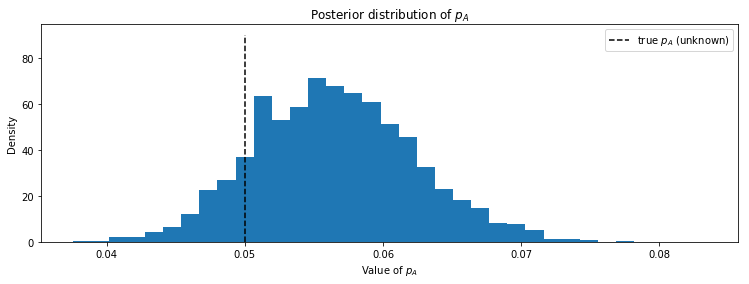

In [23]:
figsize(12.5, 4)

plt.vlines(p_true, 0, 90, linestyle="--",
          label="true $p_A$ (unknown)")
plt.hist(mcmc.trace("p")[:],
        bins=35, histtype="stepfilled", normed=True)

plt.title("Posterior distribution of $p_A$")
plt.xlabel("Value of $p_A$")
plt.ylabel("Density")
plt.legend()

In [24]:
import pymc as pm
figsize(12, 4)
# 以下２つは本来は分からない
true_p_A = 0.05
true_p_B = 0.04

N_A = 1500
N_B = 750

observation_A = pm.rbernoulli(true_p_A, N_A)
observation_B = pm.rbernoulli(true_p_B, N_B)

print("Obs from Site A: ", observation_A[:30].astype(int), "....")
print("Obs from Site B: ", observation_B[:30].astype(int), "....")

Obs from Site A:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0] ....
Obs from Site B:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] ....


In [25]:
print(observation_A.mean())
print(observation_B.mean())

0.0533333333333
0.0333333333333


In [26]:
# PyMC モデルの設定
# p_A と p_B の事前分布は一様分布と仮定する
p_A = pm.Uniform("p_A", 0, 1)
p_B = pm.Uniform("p_B", 0, 1)

@pm.deterministic
def delta(p_A = p_A, p_B=p_B):
    return p_A - p_B

# 観測データの設定
obs_A = pm.Bernoulli("obs_A", p_A, value=observation_A, observed=True)
obs_B = pm.Bernoulli("obs_B", p_B, value=observation_B, observed=True)

mcmc=pm.MCMC([p_A, p_B, delta, obs_A, obs_B])
mcmc.sample(25000, 5000)


 [-----------------100%-----------------] 25000 of 25000 complete in 2.2 sec

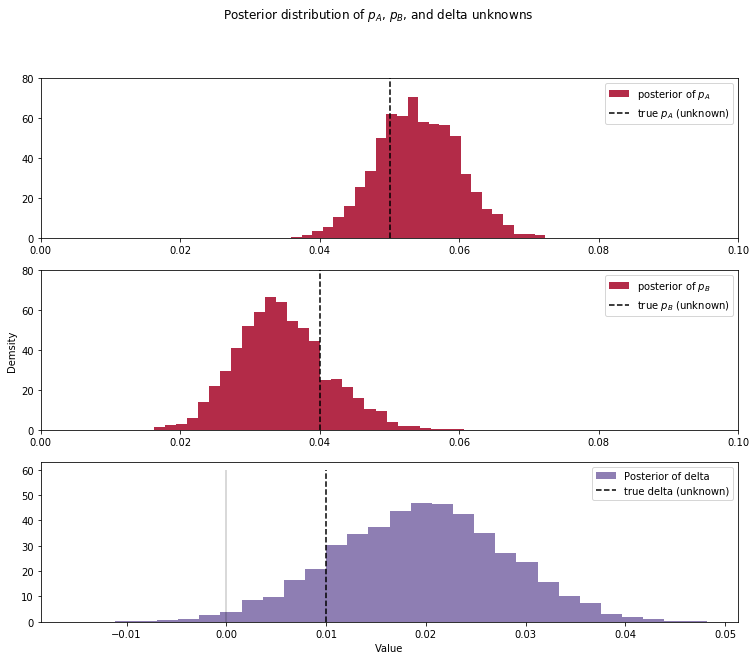

In [27]:
p_A_samples = mcmc.trace("p_A")[:]
p_B_samples = mcmc.trace("p_B")[:]
delta_samples = mcmc.trace("delta")[:]

figsize(12.5, 10)

# 事後確率分布

ax = plt.subplot(311)
plt.hist(p_A_samples, histtype='stepfilled', bins=30, alpha=0.85, label="posterior of $p_A$", 
        color="#A60628", normed=True)
plt.vlines(true_p_A, 0, 80, linestyle='--',
          label='true $p_A$ (unknown)') # 真のp_A(未知数)
plt.legend(loc="upper right")
plt.xlim(0, .1)
plt.ylim(0, 80)
plt.suptitle("Posterior distribution of $p_A$, $p_B$, and delta unknowns")

ax = plt.subplot(312)
plt.hist(p_B_samples, histtype='stepfilled', bins=30, alpha=0.85, label="posterior of $p_B$", 
        color="#A60628", normed=True)
plt.vlines(true_p_B, 0, 80, linestyle='--',
          label='true $p_B$ (unknown)') # 真のp_B(未知数)
plt.legend(loc="upper right")
plt.xlim(0, .1)
plt.ylim(0, 80)
plt.ylabel("Demsity")

ax = plt.subplot(313)
plt.hist(delta_samples, histtype="stepfilled", bins=30, alpha=0.85, label="Posterior of delta", color="#7A68A6", 
        normed=True)

plt.vlines(true_p_A - true_p_B ,0,60, linestyle="--", label="true delta (unknown)")
plt.vlines(0, 0, 60, color="black", alpha=0.2)
plt.xlabel("Value")
plt.legend(loc="upper right")

In [28]:
print("Pribability site A is WORSE than siteB :", (delta_samples < 0).mean())
print("Pribability site A is BETTER than siteB :", (delta_samples > 0).mean())

Pribability site A is WORSE than siteB : 0.01245
Pribability site A is BETTER than siteB : 0.98755


Text(0.5,1,'Probability mass ditributions of binomial random variables')

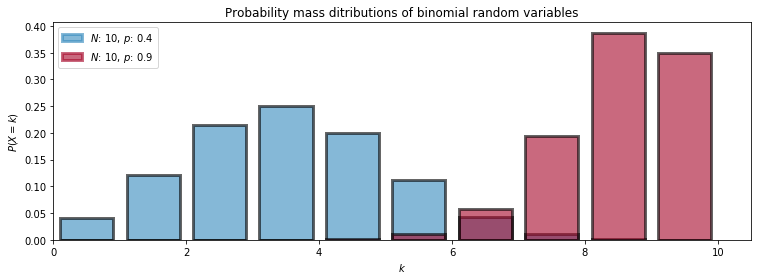

In [29]:
figsize(12.5, 4)

import scipy.stats as stats
binomial = stats.binom

parameters = [(10, .4), (10, .9)]
colors=["#348ABD", "#A60628"]

for i in range(2):
    N, p = parameters[i]
    _x = np.arange(N + 1)
    plt.bar(_x - 0.5, binomial.pmf(_x, N , p), color=colors[i], edgecolor=colors[i], alpha=0.6, linewidth=3,
           label="$N$: {}, $p$: {}".format(N, p))
    
plt.legend(loc="upper left")
plt.xlim(0, 10.5)
plt.xlabel("$k$")
plt.ylabel("$P(X = k)$")
plt.title("Probability mass ditributions of binomial random variables")

In [30]:
# カンニングのモデリング

N =100
p = pm.Uniform("freq_cheating",0,1) # カンニングの割合

true_answers = pm.Bernoulli("truths", p, size=N) # 真実

first_coin_flips=pm.Bernoulli("first_flips", 0.5, size=N)
print(first_coin_flips.value)

[False False  True False  True False False  True False  True False  True
  True  True  True False  True False False False False False  True False
 False False False  True False False False False  True False  True False
 False False  True  True False False False  True  True False False  True
  True False False False  True  True  True  True  True  True False  True
  True  True  True False  True  True  True False False  True False False
 False  True  True  True  True False False  True  True  True  True False
  True False False  True  True False False False  True  True False  True
 False  True False False]


In [31]:
second_coin_flips = pm.Bernoulli("second_flips", 0.5, size=N)

@pm.deterministic
def observed_proportion(t_a=true_answers, fc=first_coin_flips, sc=second_coin_flips):
    observed = fc*t_a+(1-fc) * sc
    return observed.sum()/float(N)

In [32]:
print(observed_proportion.value)

0.68


In [33]:
X=35
observations = pm.Binomial("obs", N, observed_proportion, observed=True, value=X)
model=pm.Model([p, true_answers, first_coin_flips, second_coin_flips, observed_proportion, observations])

mcmc=pm.MCMC(model)
mcmc.sample(40000, 15000)

 [-----------------100%-----------------] 40000 of 40000 complete in 8.7 sec

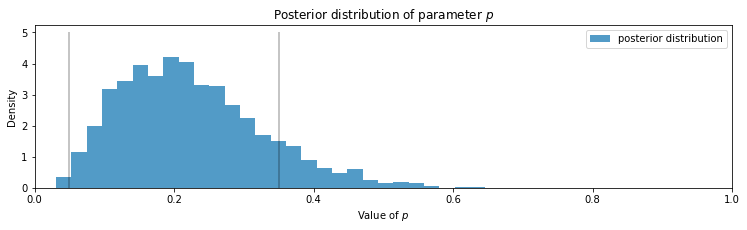

In [34]:
figsize(12.5, 3)

p_trace=mcmc.trace("freq_cheating")[:]
plt.hist(p_trace, histtype="stepfilled", normed=True, alpha=0.85, bins=30, color="#348ABD",
        label="posterior distribution")
plt.vlines([.05, .35],[0,0],[5,5,], alpha=0.3)

plt.xlim(0,1)
plt.xlabel("Value of $p$")
plt.ylabel("Density")
plt.title("Posterior distribution of parameter $p$")
plt.legend()

In [35]:
# もうひとつのモデリング
p=pm.Uniform("freq_cheating",0,1)

@pm.deterministic
def p_skewed(p=p):
    return 0.5 * p + 0.25

yes_response = pm.Binomial("number_cheaters", 100, p_skewed, value=35, observed=True)


In [36]:
model=pm.Model([yes_response, p_skewed, p])

mcmc = pm.MCMC(model)
mcmc.sample(25000, 2500)


 [-----------------100%-----------------] 25000 of 25000 complete in 1.0 sec

<pymc.distributions.new_dist_class.<locals>.new_class 'freq_cheating' at 0x1a15376cf8>

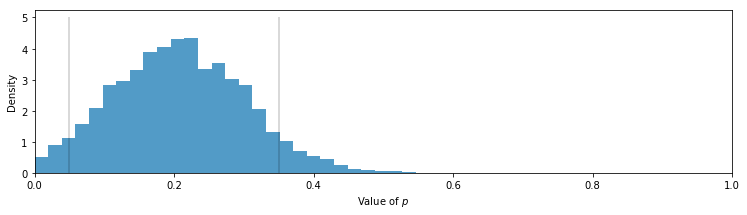

In [37]:
figsize(12.5, 3)

p_trace=mcmc.trace("freq_cheating")[:]
plt.hist(p_trace, histtype="stepfilled", normed=True, alpha=0.85, bins=30, color="#348ABD",
        label="posterior distribution")
plt.vlines([.05, .35], [0,0], [5,5], alpha=0.2)

plt.xlim(0,1)
plt.xlabel("Value of $p$")
plt.ylabel("Density")
p